# Unit 5 - Financial Planning


In [121]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [122]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [123]:
# Set current amount of crypto assets
cryto_assets = {
    "my coins": [1.2, 5.3]
}

crypto_owned = ["BTC", "ETH"]
my_btc = 1.2
my_eth = 5.3

In [124]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [125]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [126]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()

# Fetch current ETH price
eth_response = requests.get(eth_url).json()

In [127]:
print(json.dumps(btc_response, indent=4))
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18526175,
            "total_supply": 18526175,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13124.08,
                    "volume_24h": 19294200788,
                    "market_cap": 243214933327,
                    "percentage_change_1h": -0.0862154733031268,
                    "percentage_change_24h": 1.15572700042282,
                    "percentage_change_7d": 15.4697574948915,
                    "percent_change_1h": -0.0862154733031268,
                    "percent_change_24h": 1.15572700042282,
                    "percent_change_7d": 15.4697574948915
                },
                "CAD": {
                    "price": 17229.292224,
                    "volume_24h": 25329426794.4864,
                

In [128]:
# Fetch current BTC price
current_btc_data = btc_response['data']['1']['quotes']['USD']['price']
my_btc_value = round(my_btc * current_btc_data, 2)

# Fetch current ETH price
current_eth_data = eth_response['data']['1027']['quotes']['USD']['price']
my_eth_value = round(my_eth * current_eth_data, 2)
# Compute current value of my crpto

current_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your cryptocurrency portfolio is ${current_crypto_value:0.2f}")

The current value of your 1.2 BTC is $15748.90
The current value of your 5.3 ETH is $2186.57
The current value of your cryptocurrency portfolio is $17935.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [129]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [130]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [131]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stocks_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
stocks_df

AGG                                     SPY  \
                            open    high    low   close   volume    open   
time                                                                       
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3483335  345.93   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38762783

In [132]:
# Pick AGG and SPY close prices
agg_close_price = float(stocks_df["AGG"]["close"])
spy_close_price = float(stocks_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [133]:
# Compute the current value of shares
my_agg_value = round(my_agg * agg_close_price, 2)
my_spy_value = round(my_spy * spy_close_price, 2)
stock_bond_value = my_agg_value + my_spy_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your stock and bond portfolio is ${stock_bond_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00
The current value of your stock and bond portfolio is $40782.00


### Savings Health Analysis

In [134]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame()
crypto = current_crypto_value
shares = stock_bond_value
data = {"amount": [crypto, shares]}
portfolio_df = ["Crypto", "Shares"]
df_savings = pd.DataFrame(data, index=portfolio_df)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,17935.47
Shares,40782.00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba21051710>],
      dtype=object)

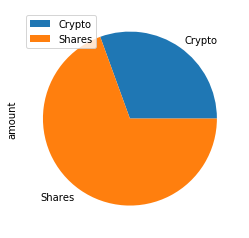

In [135]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [136]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round((crypto + shares), 2)
print(f"My total amount of savings is ${total_savings}")

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else:
    print("You are short: ${emergency_fund - total_savings}")

My total amount of savings is $58717.47
Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [137]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [138]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = "1D"
# Display sample data
stocks_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

stocks_data

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173.0   
2015-08-14 00:00:00-04:00  109.12  109.2400  109.0200  109.090   1691391.0   
2015-08-17 00:00:00-04:00  109.33  109.3992  109.2000  109.250   1212112.0   
2015-08-18 00:00:00-04:00  109.13  109.2400  109.0400  109.090    709741.0   
2015-08-19 00:00:00-04:00  109.04  109.4800  108.9600  109.430   1991745.0   
2015-08-20 00:00:00-04:00  109.58  109.6400  109.4500  109.580    925926.0   
2015-08-21 00:00:00-04:00  109.68  109.8650  109.5700  109.780   2297541.0   
2015-08-24 00:00:00-04:00  110.00  110.3400  109.5700  109.730   5065966.0   
2015-08-25 00:00:00-04:00  109.70  109.7000  109.1300  109.450   3843124.0   
2015-08-26 00:00:00-04:00  109.08  109.4100  108.8800  108.950   3673170.0   
2015-08-27 00:00:00-04:00  108.95  109.1950  108.9300  109.100   3454665.0   
2015-08-28 00:00:00-04:00  109.34  109.3700  108.9300  109.001   4604866.0   
2015-08-31 00:00:00-04:00  109.28  109.3700  108.9000  108.920   3866305.0   
2015-09-01 00:00:00-04:00  108.83  109.1100  108.7700  109.010   3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.0500  108.8100  108.900   3273302.0   
2015-09-03 00:00:00-04:00  109.06  109.1200  108.8701  109.040   1676171.0   
2015-09-04 00:00:00-04:00  109.19  109.3300  109.0200  109.280   1529407.0   
2015-09-08 00:00:00-04:00  108.96  109.0400  108.9100  109.000   1889306.0   
2015-09-09 00:00:00-04:00  108.78  109.0800  108.7022  109.020   2727831.0   
2015-09-10 00:00:00-04:00  109.00  109.0090  108.8100  108.940   2080563.0   
2015-09-11 00:00:00-04:00  109.05  109.1700  109.0100  109.050   1844878.0   
2015-09-14 00:00:00-04:00  109.18  109.2000  109.0400  109.090   1437626.0   
2015-09-15 00:00:00-04:00  109.00  109.0000  108.5000  108.590   1346316.0   
2015-09-16 00:00:00-04:00  108.59  108.6600  108.4100  108.510   1590491.0   
2015-09-17 00:00:00-04:00  108.48  109.1900  108.4000  109.170   1786153.0   
2015-09-18 00:00:00-04:00  109.26  109.3900  109.1500  109.295   4164336.0   
...                           ...       ...       ...      ...         ...   
2020-06-26 00:00:00-04:00  117.99  118.0800  117.8450  118.020   5519032.0   
2020-06-29 00:00:00-04:00  118.01  118.1100  117.9500  118.090   3212966.0   
2020-06-30 00:00:00-04:00  118.28  118.3200  117.9800  118.200   5643934.0   
2020-07-01 00:00:00-04:00  117.90  118.0700  117.7600  118.030   6247232.0   
2020-07-02 00:00:00-04:00  118.05  118.2100  117.9900  118.180   3317392.0   
2020-07-06 00:00:00-04:00  118.18  118.2100  118.0000  118.160   4663625.0   
2020-07-07 00:00:00-04:00  118.23  118.3800  118.0600  118.360   5373298.0   
2020-07-08 00:00:00-04:00  118.35  118.4500  118.2200  118.305   3942821.0   
2020-07-09 00:00:00-04:00  118.40  118.7000  118.3553  118.640   3560921.0   
2020-07-10 00:00:00-04:00  118.83  118.8300  118.4500  118.470   2910802.0   
2020-07-13 00:00:00-04:00  118.46  118.5287  118.3700  118.480   4032929.0   
2020-07-14 00:00:00-04:00  118.58  118.7400  118.5800  118.655   3611959.0   
2020-07-15 00:00:00-04:00  118.50  118.7000  118.5000  118.635   3108307.0   
2020-07-16 00:00:00-04:00  118.83  118.8900  118.7400  118.770   3007997.0   
2020-07-17 00:00:00-04:00  118.94  118.9900  118.7700  118.860   2451388.0   
2020-07-20 00:00:00-04:00  119.03  119.0600  118.9100  118.980   3366836.0   
2020-07-21 00:00:00-04:00  119.10  119.1000  119.0100  119.050   4459705.0   
2020-07-22 00:00:00-04:00  119.22  119.2700  119.110

In [139]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks = MCSimulation(
    portfolio_data = stocks_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [140]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [141]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007947,1.005413,0.997117,1.018520,0.997962,1.010201,1.001187,0.998376,1.010242,1.008949,...,0.982678,0.999546,1.007373,1.005901,1.009120,0.994411,0.992680,1.021219,0.998618,1.002606
2,1.010392,0.992151,0.992188,1.016486,0.984958,1.012233,0.989530,0.999545,0.991086,1.019968,...,0.983041,1.005653,1.011585,1.014704,1.006387,0.992705,1.004688,1.024914,0.995851,1.012219
3,1.014298,0.986029,0.974638,1.033125,0.989660,1.003855,0.986371,1.004945,1.000050,1.025297,...,0.986722,1.007669,1.003241,1.029841,1.008557,0.991314,0.989938,1.010055,0.989158,1.013785
4,1.013690,0.996055,0.974348,1.024752,0.987295,1.010585,0.980866,1.013960,0.988069,1.017428,...,0.985967,1.010136,1.001137,1.039046,1.022761,1.001880,0.997350,1.009610,0.988336,1.001963
5,1.005720,0.976797,0.969562,1.020637,0.982573,1.009382,0.973833,1.014831,0.979709,1.009973,...,0.991274,1.008693,1.003812,1.034900,1.026971,1.011456,0.993913,1.004442,0.989932,0.988601
6,0.999869,0.992674,0.969327,1.018643,0.978640,1.005631,0.967977,1.010860,0.977115,1.008684,...,0.987894,1.004021,1.003667,1.046557,1.029557,1.003005,1.008449,1.002223,0.983867,0.980914
7,1.004283,0.992403,0.963130,1.020718,0.976838,1.007545,0.970534,1.008174,0.971008,1.019564,...,0.981681,1.011379,0.993341,1.049612,1.034188,1.002594,1.024760,0.994390,0.986914,0.968989
8,1.016340,0.987468,0.960720,1.014517,0.974619,1.007868,0.982202,1.006285,0.962671,1.016800,...,0.984453,1.013374,0.998544,1.038664,1.037182,1.004553,1.020471,0.999943,0.986053,0.963223
9,1.017983,0.984594,0.958233,1.009719,0.983092,1.008850,0.985358,1.007709,0.969067,1.024191,...,0.989334,1.018556,0.990943,1.036195,1.036324,1.007169,1.022448,0.994406,0.975217,0.967500


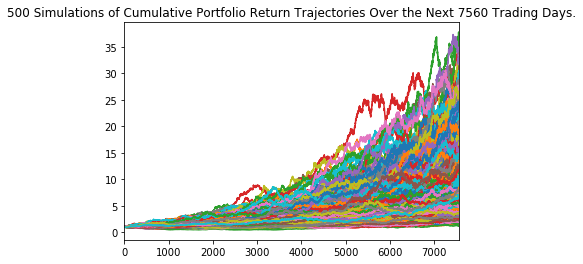

In [142]:
# Plot simulation outcomes
line_plot = MC_stocks.plot_simulation()

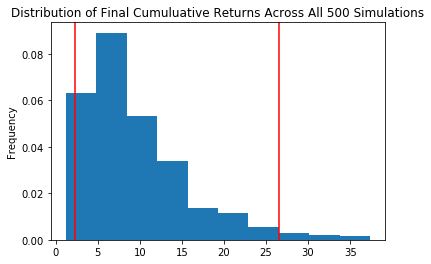

In [143]:
# Plot probability distribution and confidence intervals
bar_plot = MC_stocks.plot_distribution()

### Retirement Analysis

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(stocks_tbl)

count           500.000000
mean              9.533241
std               6.262139
min               1.201371
25%               5.138023
50%               7.839356
75%              12.138428
max              37.369672
95% CI Lower      2.345962
95% CI Upper     26.483887
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [145]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stocks_tbl[8]*20000,2)
ci_upper = round(stocks_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46919.24 and $529677.74


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [146]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_new = round(stocks_tbl[8]* initial_investment_new,2)
ci_upper_new = round(stocks_tbl[9]* initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_new} and ${ci_upper_new}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70378.85 and $794516.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [147]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_five = MCSimulation(
    portfolio_data = stocks_data,
    weights = [0.8, 0.2],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [148]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996110,1.001173,0.999875,0.999170,1.004055,0.996453,0.996451,1.001351,1.002583,1.002180,...,0.998505,0.999845,0.999326,0.997053,0.998301,0.994613,1.003325,1.002603,0.997837,0.996144
2,0.994488,1.002165,0.996850,1.002521,1.000816,0.998335,0.997371,0.998889,0.996541,0.999611,...,1.001756,1.000197,0.999259,0.991680,0.997698,0.999593,0.997760,1.008077,0.999051,0.994923
3,0.998007,1.002066,0.994734,1.002129,1.002127,0.995037,0.999310,0.992455,0.993925,0.998112,...,1.004910,0.999126,1.003580,0.994770,1.003004,0.996224,0.994746,1.010092,0.989853,0.993986
4,1.000889,1.003841,0.996605,1.004823,1.003401,0.995312,1.002183,0.996774,0.999966,1.003006,...,1.006300,0.993751,1.014150,0.999632,1.009793,0.997802,0.990437,1.014096,0.986911,0.990980
5,0.997740,1.004171,0.993982,1.003365,1.001778,0.996577,1.002265,1.000796,1.000765,0.999352,...,1.005472,0.996495,1.016797,1.004050,1.010952,1.001354,0.994977,1.013327,0.985878,0.987588
6,1.003070,1.010257,0.997869,1.007297,1.001721,0.994761,1.003744,0.999429,0.998434,0.997976,...,1.009653,0.992703,1.017654,1.002595,1.012823,1.008020,0.998691,1.017026,0.983650,0.987282
7,1.001602,1.005822,0.996482,1.003762,1.000299,1.001332,1.004194,0.993401,1.006558,1.003535,...,1.006147,0.993689,1.012095,1.004041,1.015513,1.009192,0.991171,1.015750,0.986101,0.986388
8,1.001660,1.007440,1.005327,1.009885,1.001650,1.006434,1.006385,0.986747,1.007879,1.001263,...,1.009547,0.992784,1.011131,1.003867,1.010074,1.012504,0.988879,1.013361,0.987427,0.987474
9,1.005880,1.009492,1.001152,1.004697,1.002626,1.008937,1.004146,0.986444,1.009941,0.999871,...,1.013323,0.988560,1.012855,1.003947,1.009002,1.014640,0.987751,1.013453,0.991150,0.986596


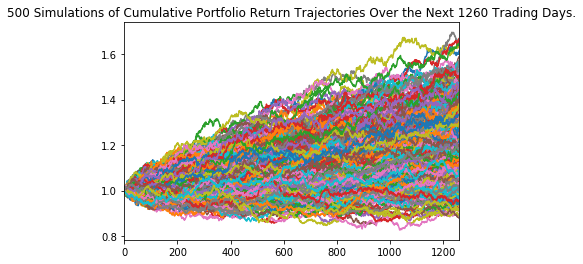

In [149]:
# Plot simulation outcomes
line_plot_five = MC_stocks_five.plot_simulation()

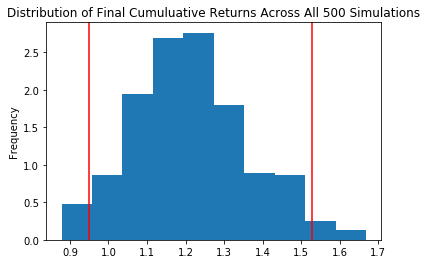

In [150]:
# Plot probability distribution and confidence intervals
bar_plot_five = MC_stocks_five.plot_distribution()

In [151]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_five_tbl = MC_stocks_five.summarize_cumulative_return()

# Print summary statistics
print(stocks_five_tbl)

count           500.000000
mean              1.213523
std               0.148604
min               0.878457
25%               1.112363
50%               1.202707
75%               1.307945
max               1.668002
95% CI Lower      0.949286
95% CI Upper      1.527155
Name: 1260, dtype: float64


In [152]:
# Set initial investment
initial_investment_five = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stocks_five_tbl[8]* initial_investment_five,2)
ci_upper_five = round(stocks_five_tbl[9]* initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $47464.28 and $76357.73


### Ten Years Retirement Option

In [153]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_ten = MCSimulation(
    portfolio_data = stocks_data,
    weights = [0.7, 0.3],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [154]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000184,0.998422,1.002845,1.004580,0.991493,0.999494,0.999104,0.995400,0.998589,1.002798,...,1.005732,1.003677,0.995850,1.000449,1.002938,1.002503,0.997330,1.001373,1.002087,1.005177
2,1.000643,0.999790,1.014595,1.007670,0.994621,1.006723,0.998399,0.989193,0.995869,1.003586,...,1.008015,0.999426,0.997841,0.997306,1.005221,1.012129,1.000656,1.000377,0.994660,1.006323
3,0.996477,1.001818,1.019020,1.012658,0.994159,1.009607,1.000186,0.991924,0.998369,0.997405,...,1.009090,0.998472,0.996877,0.996530,1.002857,1.012135,1.001665,1.002099,0.994867,1.011989
4,0.994622,1.005194,1.007568,1.009643,0.991793,1.012931,1.001872,0.988665,1.002000,0.991980,...,1.011441,1.001760,0.999483,1.002742,1.001613,1.012336,0.990598,1.002680,0.996141,1.010189
5,0.990023,1.000397,1.001102,1.014952,0.983295,1.011244,1.005426,0.994628,1.003199,0.993018,...,1.014090,1.000399,1.005118,0.999070,1.008456,1.004455,0.991035,1.007592,0.995807,1.014921
6,0.988828,1.007915,0.993666,1.011382,0.986061,1.009984,1.011681,0.996955,1.001394,0.991936,...,1.011215,0.993519,1.006537,0.996089,1.005970,1.007088,0.992933,0.998885,0.996032,1.021950
7,0.990753,1.011051,0.999362,1.005406,0.990721,1.003775,1.013854,0.998186,1.004128,0.991756,...,1.012965,1.001187,1.009168,0.997617,1.008443,1.001532,0.998002,1.002583,1.001675,1.011379
8,0.999530,1.009359,1.000718,1.004393,0.992367,0.998853,1.013865,0.995275,1.015613,0.997807,...,1.008965,1.007349,1.003624,0.999643,1.011618,0.999323,1.000069,1.003151,1.001748,1.021323
9,0.994981,1.006995,0.992778,1.006184,0.990994,0.992365,1.015332,0.998925,1.012142,0.994887,...,1.004040,0.996205,1.003195,1.003858,1.014447,1.006087,1.000849,0.995386,1.006591,1.024499


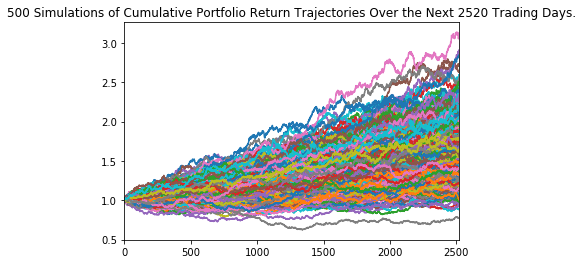

In [155]:
# Plot simulation outcomes
line_plot_ten = MC_stocks_ten.plot_simulation()

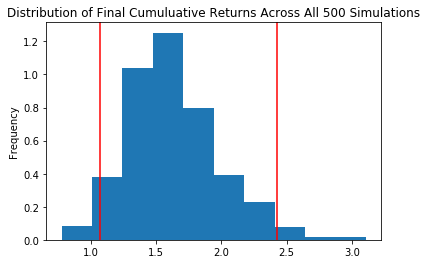

In [156]:
# Plot probability distribution and confidence intervals
bar_plot_ten = MC_stocks_ten.plot_distribution()

In [157]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_ten_tbl = MC_stocks_ten.summarize_cumulative_return()

# Print summary statistics
print(stocks_ten_tbl)

count           500.000000
mean              1.640712
std               0.351158
min               0.775573
25%               1.392591
50%               1.615226
75%               1.845485
max               3.106964
95% CI Lower      1.066861
95% CI Upper      2.424953
Name: 2520, dtype: float64


In [158]:
# Set initial investment
initial_investment_ten = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stocks_ten_tbl[8]* initial_investment_ten,2)
ci_upper_ten = round(stocks_ten_tbl[9]* initial_investment_ten,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $42674.42 and $96998.11
